In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#displaying null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
Survived = data[data["Survived"]==1]
Non_Survived = data[data["Survived"]==0]
outlier = len(Survived)/float(len(Non_Survived))
print(outlier)
print("Survived : {} ".format(len(Survived)))
print("Non_Survived : {} ".format(len(Non_Survived)))

0.6229508196721312
Survived : 342 
Non_Survived : 549 


<function matplotlib.pyplot.show(close=None, block=None)>

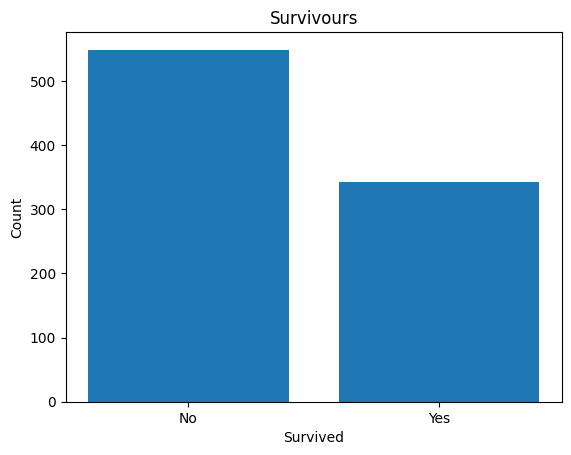

In [13]:
Survived=data['Survived'].value_counts()
plt.bar(Survived.index, Survived.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivours')
plt.xticks([0,1],['No','Yes'])
plt.show

Text(0.5, 1.0, 'Survivors by Gender')

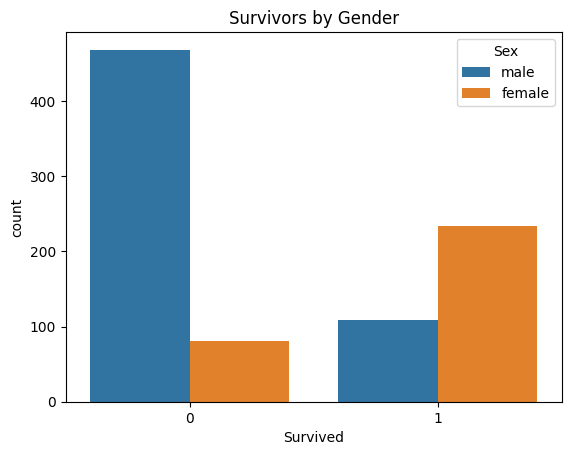

In [15]:
sns.countplot(x=data['Survived'], hue = data['Sex'])
plt.title('Survivors by Gender')

<Axes: xlabel='Survived', ylabel='count'>

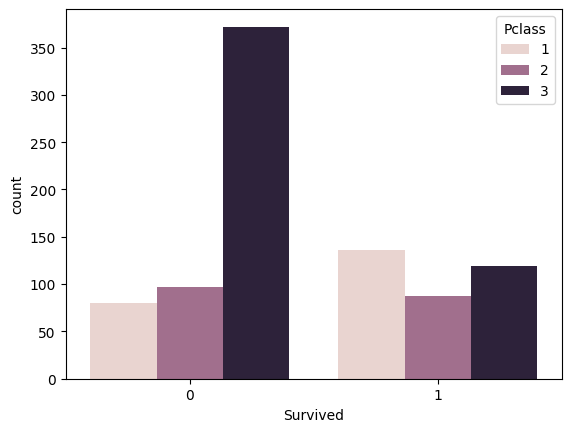

In [16]:
sns.countplot(x=data['Survived'], hue = data['Pclass'])

In [38]:
import pandas as pd
data= pd.get_dummies(data,columns=['Sex', 'Embarked'])
print(data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_0  Sex_1  Embarked_0.0  \
0         0       3  22.0      1      0   7.2500   True  False          True   
1         1       1  38.0      1      0  71.2833  False   True         False   
2         1       3  26.0      0      0   7.9250  False   True          True   
3         1       1  35.0      1      0  53.1000  False   True          True   
4         0       3  35.0      0      0   8.0500   True  False          True   

   Embarked_1.0  Embarked_2.0  
0         False         False  
1          True         False  
2         False         False  
3         False         False  
4         False         False  


In [40]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,0,3,22.0,1,0,7.2500,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,False,True,False,True,False
2,1,3,26.0,0,0,7.9250,False,True,True,False,False
3,1,1,35.0,1,0,53.1000,False,True,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,False


In [42]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.770949720670391


In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[91 19]
 [22 47]]


In [17]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Survived'] = data['Survived'].astype(int)